#Pre-requisites

In [ ]:
# Installing pyspark
# ---
#
!pip install pyspark

In [255]:
# Next, we run a local spark session
# ---
#
from pyspark.sql import SparkSession
import pandas as pd
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext

# Register the DataFrame as a Table

In [309]:
from pyspark.sql import SQLContext
sqlCtx = SQLContext(sc)
saf_df = sqlCtx.read.json("saf_stock.csv")

saf_df.registerTempTable('saf_stock')

tables = sqlCtx.tableNames()

print(tables)

['saf_stock']


/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:79: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/pyspark/sql/dataframe.py:140: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  FutureWarning


In [310]:
# Pass in the SparkContext object `sc`
sqlCtx = SQLContext(sc)
saf_df = sqlCtx.read.csv("saf_stock.csv",inferSchema=True, header=True)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:79: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [311]:
#Printing the first 5 records
print(type(saf_df))
saf_df.head(5)
saf_df.show(n=5)

<class 'pyspark.sql.dataframe.DataFrame'>
+----------+------------------+---------+---------+------------------+--------+------------------+
|      Date|              Open|     High|      Low|             Close|  Volume|         Adj Close|
+----------+------------------+---------+---------+------------------+--------+------------------+
|2012-01-03|         59.970001|61.060001|59.869999|         60.330002|12668800|52.619234999999996|
|2012-01-04|60.209998999999996|60.349998|59.470001|59.709998999999996| 9593300|         52.078475|
|2012-01-05|         59.349998|59.619999|58.369999|         59.419998|12768200|         51.825539|
|2012-01-06|         59.419998|59.450001|58.869999|              59.0| 8069400|          51.45922|
|2012-01-09|         59.029999|59.549999|58.919998|             59.18| 6679300|51.616215000000004|
+----------+------------------+---------+---------+------------------+--------+------------------+
only showing top 5 rows



In [312]:
#Displaying the first_five records on the Open column
for r in first_five:
    print(r.Open)

59.970001
60.209998999999996
59.349998
59.419998
59.029999


#Data Importation and Exploration

In [313]:
#Selecting the first few records of our DF
saf_df[['Date','Open', 'High', 'Low', 'Close','Volume','Adj Close']].show(10)

+----------+------------------+------------------+------------------+------------------+--------+------------------+
|      Date|              Open|              High|               Low|             Close|  Volume|         Adj Close|
+----------+------------------+------------------+------------------+------------------+--------+------------------+
|2012-01-03|         59.970001|         61.060001|         59.869999|         60.330002|12668800|52.619234999999996|
|2012-01-04|60.209998999999996|         60.349998|         59.470001|59.709998999999996| 9593300|         52.078475|
|2012-01-05|         59.349998|         59.619999|         58.369999|         59.419998|12768200|         51.825539|
|2012-01-06|         59.419998|         59.450001|         58.869999|              59.0| 8069400|          51.45922|
|2012-01-09|         59.029999|         59.549999|         58.919998|             59.18| 6679300|51.616215000000004|
|2012-01-10|             59.43|59.709998999999996|             5

In [314]:
#To DIsplay the column names
saf_df.columns

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']

In [315]:
# #Filtering to pick the value of the share where the opening stock was > 50
five_plus = saf_df[saf_df['Open'] > 50]
#Displaying the first 5
five_plus.show(5)

+----------+------------------+---------+---------+------------------+--------+------------------+
|      Date|              Open|     High|      Low|             Close|  Volume|         Adj Close|
+----------+------------------+---------+---------+------------------+--------+------------------+
|2012-01-03|         59.970001|61.060001|59.869999|         60.330002|12668800|52.619234999999996|
|2012-01-04|60.209998999999996|60.349998|59.470001|59.709998999999996| 9593300|         52.078475|
|2012-01-05|         59.349998|59.619999|58.369999|         59.419998|12768200|         51.825539|
|2012-01-06|         59.419998|59.450001|58.869999|              59.0| 8069400|          51.45922|
|2012-01-09|         59.029999|59.549999|58.919998|             59.18| 6679300|51.616215000000004|
+----------+------------------+---------+---------+------------------+--------+------------------+
only showing top 5 rows



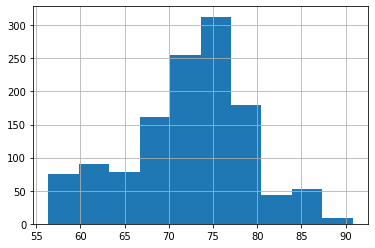

In [316]:
#Visualising the Open column
pandas_df = saf_df.toPandas()
pandas_df['Open'].hist();

#Data Preparation

In [ ]:
# #Rounding off the data to 2dp
# from pyspark.sql.types import IntegerType
# for c in saf_df.columns:
#     saf_df = saf_df.withColumn(c, round(c, 2))
# saf_df.show()

In [317]:
#Renaming the Adj Close column to Adj
saf_df = saf_df.select(col("Date"),col("Open"),col("High"),col("Low"), col("Close"), col("Volume"),col("Adj Close").alias('adj'))

In [318]:
#Checking our data types
saf_df.dtypes

[('Date', 'string'),
 ('Open', 'double'),
 ('High', 'double'),
 ('Low', 'double'),
 ('Close', 'double'),
 ('Volume', 'int'),
 ('adj', 'double')]

In [319]:
#Checking the column name has changed
saf_df.columns

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'adj']

In [320]:
#Changing our data to float 
from pyspark.sql.types import FloatType
saf_df.Date.cast(FloatType())
saf_df.Open.cast(FloatType())
saf_df.High.cast(FloatType())
saf_df.Low.cast(FloatType())
saf_df.Close.cast(FloatType())
saf_df.Volume.cast(FloatType())
saf_df.adj.cast(FloatType())

Column<'CAST(adj AS FLOAT)'>

In [321]:
#Adding a new Column HV Ratio
# import the functions as F from pyspark.sql
import pyspark.sql.functions as F
from  pyspark.sql.types import IntegerType
saf_df = saf_df.withColumn("HV Ratio",saf_df['High']/saf_df['Volume'])
print(saf_df.select('HV Ratio').show())

+--------------------+
|            HV Ratio|
+--------------------+
|4.819714653321546E-6|
|6.290848613094555E-6|
|4.669412994783916E-6|
|7.367338463826307E-6|
|8.915604778943901E-6|
|8.644477436914568E-6|
|9.351828421515645E-6|
| 8.29141562102703E-6|
|7.712212102001476E-6|
|7.071764823529412E-6|
|1.015495466386981E-5|
|6.576354146362592...|
| 5.90145296180676E-6|
|8.547679455011844E-6|
|8.420709512685392E-6|
|1.041448341728929...|
|8.316075414862431E-6|
|9.721183814992126E-6|
|8.029436027707578E-6|
|6.307432259386365E-6|
+--------------------+
only showing top 20 rows

None


#Data Analysis

In [322]:
#We shall be answering the questions in the project at this point
#Q1. What day had the Peak High in Price?
print(saf_df.orderBy(saf_df['High'].desc()).head(1)[0][0])

2015-01-13


In [323]:
#Q2. What is the mean of the Close column?
from pyspark.sql.functions import mean
print(saf_df.select(mean('Close')).show())

+-----------------+
|       avg(Close)|
+-----------------+
|72.38844998012726|
+-----------------+

None


In [324]:
# Q3. What is the max and min of the Volume column?
from pyspark.sql.functions import max, min
print(saf_df.select(max('Volume'),min('Volume')).show())

+-----------+-----------+
|max(Volume)|min(Volume)|
+-----------+-----------+
|   80898100|    2094900|
+-----------+-----------+

None


In [325]:
#Q4. How many days was the Close lower than 60 dollars?
print(saf_df.filter(saf_df['Close'] < 60).count())

81


In [326]:
#Q5. What percentage of the time was the High greater than 80 dollars?
print((saf_df.filter(saf_df['High']>80).count()/saf_df.count()) * 100)

9.141494435612083


In [328]:
# Q6. What is the Pearson correlation between High and Volume?
from pyspark.sql.functions import corr
print(saf_df.select(corr('High','Volume')).show())

+-------------------+
| corr(High, Volume)|
+-------------------+
|-0.3384326061737161|
+-------------------+

None


In [329]:
#Q7. What is the max High per year?
from pyspark.sql.functions import year
annual_df = saf_df.withColumn("Year",year(saf_df['Date']))
max_high_df = annual_df.groupBy('Year').max()
print(max_high_df .select('Year','max(High)').show())

+----+---------+
|Year|max(High)|
+----+---------+
|2015|90.970001|
|2013|81.370003|
|2014|88.089996|
|2012|77.599998|
|2016|75.190002|
+----+---------+

None


In [330]:
#Q8. What is the average Close for each Calendar Month?
from pyspark.sql.functions import month
monthly_df = saf_df.withColumn('Month',month('Date'))
monthly_avg = monthly_df.select(['Month','Close']).groupBy('Month').mean()
print(monthly_avg.select('Month','avg(Close)').orderBy('Month').show())

+-----+-----------------+
|Month|       avg(Close)|
+-----+-----------------+
|    1|71.44801958415842|
|    2|  71.306804443299|
|    3|71.77794377570092|
|    4|72.97361900952382|
|    5|72.30971688679247|
|    6| 72.4953774245283|
|    7|74.43971943925233|
|    8|73.02981855454546|
|    9|72.18411785294116|
|   10|71.57854545454543|
|   11| 72.1110893069307|
|   12|72.84792478301885|
+-----+-----------------+

None
